In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import math
pd.options.display.float_format = '{:.3f}'.format

# Comparing Models - OLS and KNN
The aim of this report is to compare the accuracy of the OLS and linear regression models. To do this we will import a dataset from a study of unknown origin, containing details of weight, age and Blood Fat Content (BFC) data for a sample of 25 people. 

### Data Import and Initial Manipulation

In [101]:
# Original path now '403 Forbidden'
# PATH = 'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x09.txt'
PATH = 'C://Users//fergu//blood_fat.txt'
blood = pd.read_table(PATH, skiprows=35)
blood.columns=['data']
blood.head()

,data
0,1 1 84 46 354
1,2 1 73 20 190
2,3 1 65 52 405
3,4 1 70 30 263
4,5 1 76 57 451


In [102]:
blood['data2'] = blood['data'].str.split(' ')
blood

,data,data2
0,1 1 84 46 354,"[, 1, , 1, , 84, , 46, , 354]"
1,2 1 73 20 190,"[, 2, , 1, , 73, , 20, , 190]"
2,3 1 65 52 405,"[, 3, , 1, , 65, , 52, , 405]"
3,4 1 70 30 263,"[, 4, , 1, , 70, , 30, , 263]"
4,5 1 76 57 451,"[, 5, , 1, , 76, , 57, , 451]"
5,6 1 69 25 302,"[, 6, , 1, , 69, , 25, , 302]"
6,7 1 63 28 288,"[, 7, , 1, , 63, , 28, , 288]"
7,8 1 72 36 385,"[, 8, , 1, , 72, , 36, , 385]"
8,9 1 79 57 402,"[, 9, , 1, , 79, , 57, , 402]"
9,10 1 75 44 365,"[10, , 1, , 75, , 44, , 365]"


In [103]:
for i in range(0, 10):
    blood[(i)] = None

for i in range(0, len(blood)):
    for j in range(0, len(blood.loc[i]['data2'])):
        if i <= 8:
            blood.loc[i][j] = blood.loc[i]['data2'][j]
        else:
            blood.loc[i][j+1] = blood.loc[i]['data2'][j]

In [104]:
blood

,data,data2,0,1,2,3,4,5,6,7,8,9
0,1 1 84 46 354,"[, 1, , 1, , 84, , 46, , 354]",,1,,1,,84,,46,,354
1,2 1 73 20 190,"[, 2, , 1, , 73, , 20, , 190]",,2,,1,,73,,20,,190
2,3 1 65 52 405,"[, 3, , 1, , 65, , 52, , 405]",,3,,1,,65,,52,,405
3,4 1 70 30 263,"[, 4, , 1, , 70, , 30, , 263]",,4,,1,,70,,30,,263
4,5 1 76 57 451,"[, 5, , 1, , 76, , 57, , 451]",,5,,1,,76,,57,,451
5,6 1 69 25 302,"[, 6, , 1, , 69, , 25, , 302]",,6,,1,,69,,25,,302
6,7 1 63 28 288,"[, 7, , 1, , 63, , 28, , 288]",,7,,1,,63,,28,,288
7,8 1 72 36 385,"[, 8, , 1, , 72, , 36, , 385]",,8,,1,,72,,36,,385
8,9 1 79 57 402,"[, 9, , 1, , 79, , 57, , 402]",,9,,1,,79,,57,,402
9,10 1 75 44 365,"[10, , 1, , 75, , 44, , 365]",None,10,,1,,75,,44,,365


In [105]:
blood.columns

Index(['data', 'data2', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object')

In [106]:
# Remove unneeded columns
blood.drop(['data', 'data2', 0, 1, 2, 3, 4, 6, 8], axis=1, inplace=True)

In [107]:
blood.head()

,5,7,9
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


In [108]:
# Data now ready to use. Change column names, reflecting that they 
# are not yet normalized:
blood.columns = ['weight_unnorm', 'age_unnorm', 'bfc_unnorm']

In [109]:
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


In [110]:
blood.dtypes

weight_unnorm    object
age_unnorm       object
bfc_unnorm       object
dtype: object

In [111]:
# Change the type of all data from string to float
for i in range(0, len(blood)):
    for col in blood.columns:
            blood.loc[[i],[col]] = blood.loc[[i],[col]].astype(float)
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


### Plot BFC vs. Each of the Two Variables 
There is one outlier, a weight of 27 kg. This is unreasonably low so we will set it to the mean weight.

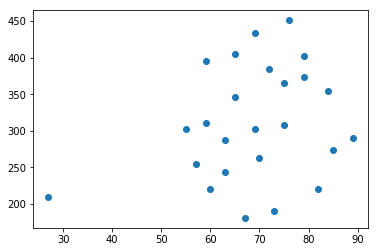

In [112]:
plt.scatter(x='weight_unnorm', y='bfc_unnorm', data=blood)
plt.show()

In [113]:
list(blood['weight_unnorm']).index(27)

10

In [114]:
blood.loc[[10],['weight_unnorm']] = blood['weight_unnorm'].mean()

In [115]:
# Normalize all variables
blood['weight'] = [(blood['weight_unnorm'][i] - blood['weight_unnorm'].min()) / (blood['weight_unnorm'].max() - blood['weight_unnorm'].min())
                   for i in range(0, len(blood['weight_unnorm']))]

In [116]:
blood['age'] = [(blood['age_unnorm'][i] - blood['age_unnorm'].min()) / (blood['age_unnorm'].max() - blood['age_unnorm'].min()) 
                   for i in range(0, len(blood['age_unnorm']))]

In [117]:
blood['bfc'] = [(blood['bfc_unnorm'][i] - blood['bfc_unnorm'].min()) / (blood['bfc_unnorm'].max() - blood['bfc_unnorm'].min()) 
                   for i in range(0, len(blood['bfc_unnorm']))]

In [118]:
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc
0,84.000,46,354,0.853,0.650,0.641
1,73.000,20,190,0.529,0.000,0.033
2,65.000,52,405,0.294,0.800,0.830
3,70.000,30,263,0.441,0.250,0.304
4,76.000,57,451,0.618,0.925,1.000


### The Analysis
First try to regress on blood fat level using a standard linear regression model.

In [119]:
type(blood['weight'][4])

numpy.float64

### No Clear Relationship Between Weight and  BFC
Some attempts were made to find a relationship using logs and square roots, as shown below; but you cannot create a relationship where none exists.

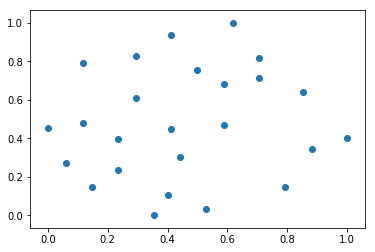

In [120]:
plt.scatter(x='weight', y='bfc', data=blood)
plt.show()

In [121]:
blood['rootweight'] = [np.sqrt(blood['weight'][i]) for i in range(0, len(blood['weight']))]
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight
0,84.000,46,354,0.853,0.650,0.641,0.924
1,73.000,20,190,0.529,0.000,0.033,0.728
2,65.000,52,405,0.294,0.800,0.830,0.542
3,70.000,30,263,0.441,0.250,0.304,0.664
4,76.000,57,451,0.618,0.925,1.000,0.786


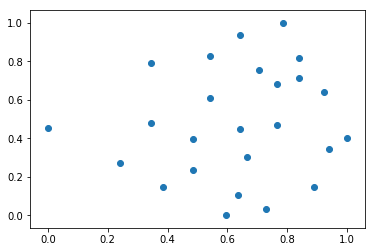

In [122]:
plt.scatter(x='rootweight', y='bfc', data=blood)
plt.show()

In [123]:
blood['squareweight'] = [(blood['weight'][i])**2 for i in range(0, len(blood['weight']))]
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381


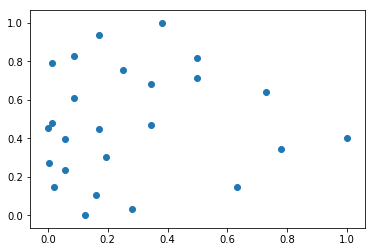

In [124]:
plt.scatter(x='squareweight', y='bfc', data=blood)
plt.show()

In [125]:
# Add 0.01 to formula to prevent log(0)
blood['logweight'] = [np.log(blood['weight'][i] + 0.01) for i in range(0, len(blood['weight']))]
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466


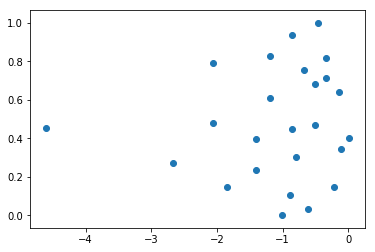

In [126]:
plt.scatter(x='logweight', y='bfc', data=blood)
plt.show()

### A Good Linear Relationship Exists Between Age and BFC

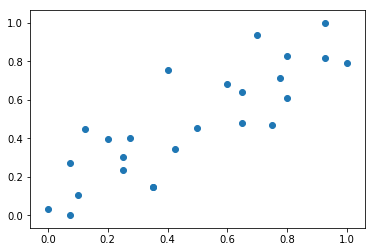

In [127]:
plt.scatter(x='age', y='bfc', data=blood)
plt.show()

### Run the Linear Regression Model
Running this model gives what appears to be a reasonably good R-squared value between BFC and the other two variables.

In [128]:
linmodel = linear_model.LinearRegression()
Y = blood['bfc'].values.reshape(-1,1)
x = ['age', 'weight']
X = blood[x]
linmodel.fit(X, Y)

print('Coefficients: \n', linmodel.coef_)
print('Intercept: \n', linmodel.intercept_)
print('R-squared: ', linmodel.score(X, Y))

Coefficients: 
 [[ 0.78481407  0.03925465]]
Intercept: 
 [ 0.08758423]
R-squared:  0.702538202786


### Try Using the KNN Model
The accuracy is clearly much worse with KNN than using the linear regression model. The KNN is slightly better when weighted. The KNN may have suffered from having one variable poorly correlated with the BFC. If we use 5 neighbors instead of 10, the accuracy decreases by about 0.4 - 0.5 in both the unweighted and weighted cases.

In [129]:
from sklearn import neighbors
# The unweighted model:
knn = neighbors.KNeighborsRegressor(n_neighbors=15)

# The weighted model:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')

Yk = blood['bfc']
Xk = blood[['age', 'weight']]

knn.fit(Xk, Yk)
knn_w.fit(Xk, Yk)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='distance')

In [130]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, Xk, Yk, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, Xk, Yk, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.13 (+/- 1.16)
Weighted Accuracy: 0.11 (+/- 1.14)


### Create an Extra Variable and Re-Run Both Models

Since the KNN model performed poorly, the aim here is to see if it predicts better when both variables correlate more linearly with BFC. Thus we create a new variable 'good_corr' and use it instead of weight, which as we saw before, correlated very poorly with BFC.

In [131]:
np.random.seed(7)
blood['random'] = None
blood['random'] = [np.random.randint(-14,14) for i in range(0,len(blood['random']))]

In [132]:
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight,random
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147,1
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617,-10
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190,11
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796,8
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466,-11


In [133]:
blood['good_corr'] = 1.6 * blood['age'] + 0.01 * blood['random']
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight,random,good_corr
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147,1,1.050
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617,-10,-0.100
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190,11,1.390
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796,8,0.480
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466,-11,1.370


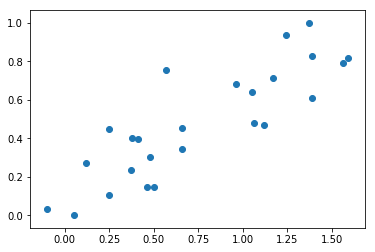

In [134]:
# The relationship is more linear with 'good_corr' since it is derived from age.
# But the scaling is lost
plt.scatter(x='good_corr', y='bfc', data=blood)
plt.show()

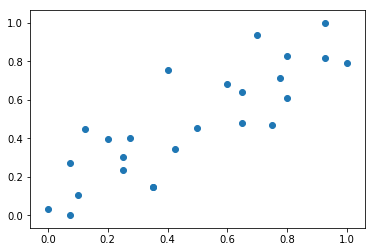

In [135]:
# Age again, just to see the linearity of the relationship:
plt.scatter(x='age', y='bfc', data=blood)
plt.show()

### Re-Run the Linear Regression Model for the New Variable
The linear model again does reasonably well in this case.

In [136]:
linmodel = linear_model.LinearRegression()
Y = blood['bfc'].values.reshape(-1,1)
x = ['age', 'good_corr']
X = blood[x]
linmodel.fit(X, Y)

print('Coefficients: \n', linmodel.coef_)
print('Intercept: \n', linmodel.intercept_)
print('R-squared: ', linmodel.score(X, Y))

Coefficients: 
 [[-0.10345884  0.54769898]]
Intercept: 
 [ 0.11452287]
R-squared:  0.724686830425


### Re-Run the KNN Model
The accuracy here is again poor, but better (if unweighted) with two variables that correlate well with the outcome, than before, when only one did. The unweighted accuracy has increased from 0.12 to 0.21, whereas in the weighted case it has decreased from 0.12 to 0.11.

In [137]:
# The unweighted model:
knn = neighbors.KNeighborsRegressor(n_neighbors=14)

# The weighted model:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=14, weights='distance')

Yk = blood['bfc']
Xk_new_var = blood[['age', 'good_corr']]

knn.fit(Xk_new_var, Yk)
knn_w.fit(Xk_new_var, Yk)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='distance')

In [138]:
score = cross_val_score(knn, Xk_new_var, Yk, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, Xk_new_var, Yk, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.01 (+/- 1.33)
Weighted Accuracy: 0.08 (+/- 1.47)


### Re-Run Both with Two Poorly-Correlated Variables
This time we run both models using two variables deliberately chosen to correlate poorly with BCF. One is the original weight variable 'weight', and the other is 'no_corr', a variable engineered from the age variable as shown below.

In [139]:
# Create a new variable, adding 0.01 to each term to prevent log(0) or sqrt(0)
blood['no_corr'] = np.log(blood['age'] + 0.01) - 4 * np.sqrt(blood['age'] + 0.01) 
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight,random,good_corr,no_corr
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147,1,1.050,-3.665
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617,-10,-0.100,-5.005
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190,11,1.390,-3.811
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796,8,0.480,-3.387
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466,-11,1.370,-3.935


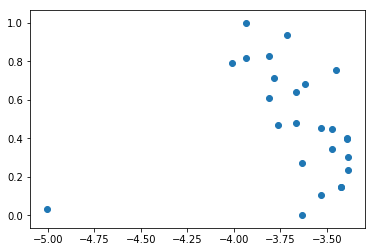

In [140]:
# The plot shows the non-linearity of the relationship between 
# BCF and the new variable:
plt.scatter(x='no_corr', y='bfc', data=blood)
plt.show()

### Re-Run the OLS Linear Regression Model for the Two Variables Having Poor Correlation
Not surprisingly, the accuracy of the OLS linear regression model is extremely poor using the two poorly-correlated input variables. Clearly this model works best when it has at least one well-correlated variable to work with. The addition of further well-correlated variables has not added much to the accuracy of the model. This is probably because the additional variable was derived from one of the other variables, thus the slight additional accuracy obtained could be due to random chance.

In [141]:
non_linmodel = linear_model.LinearRegression()
Y = blood['bfc'].values.reshape(-1,1)
x = ['no_corr', 'weight']
X = blood[x]
linmodel.fit(X, Y)

print('Coefficients: \n', linmodel.coef_)
print('Intercept: \n', linmodel.intercept_)
print('R-squared: ', linmodel.score(X, Y))

Coefficients: 
 [[-0.08108366  0.12274623]]
Intercept: 
 [ 0.12717265]
R-squared:  0.0230545096114


### Re-Run the KNN Model
Using the KNN model gives a much higher accuracy, a lot better than the OLS model. Thus KNN may be the better choice when there is a lack of clear correlation between the output variable and any of the input variables. The weighted OLS model does particularly well, giving an R-Squared value of 0.86.

In [142]:
# The unweighted model:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)

# The weighted model:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')

Yno_corr = blood['bfc']
Xno_corr = blood[['no_corr', 'weight']]

knn.fit(Xno_corr, Yno_corr)
knn_w.fit(Xno_corr, Yno_corr)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance')

In [143]:
score = cross_val_score(knn, Xno_corr, Yno_corr, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, Xno_corr, Yno_corr, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.61 (+/- 1.69)
Weighted Accuracy: -0.66 (+/- 1.67)


#### Correlation Matrix
This shows the correlation between input and derived variables used in the analysis.

In [144]:
corrmat = blood[['weight', 'age', 'bfc', 'good_corr', 'no_corr']].corr()
corrmat

,weight,age,bfc,good_corr,no_corr
weight,1.000,0.098,0.119,0.075,-0.024
age,0.098,1.000,0.837,0.987,-0.175
bfc,0.119,0.837,1.000,0.851,-0.097
good_corr,0.075,0.987,0.851,1.000,-0.147
no_corr,-0.024,-0.175,-0.097,-0.147,1.000


### Summary of Results
Clearly the OLS model performed better than KNN no matter what combination of input variables was used, whether both correlated well with the output variable or just one. It seems to be the case that OLS will do reasonably well as long as one of the input variables correlates well with the outcome. 


### One poorly correlated variable, one well correlated

#### OLS: 0.70

#### KNN (Folds = 5 in all cases):

neighbors = 15: 
unweighted: -0.13;
weighted: 0.11

neighbors = 10:
unweighted: 0.03;
weighted: 0.08
    
neighbors = 5:
unweighted: 0.1;
weighted: 0.12
    
neighbors = 2:
unweighted: -0.22; 
weighted: -0.13    
    
### Two well correlated variables    

#### OLS: 0.73

#### KNN (Folds = 5 in all cases):

neighbors = 15:
unweighted: -0.04;
weighted: 0.09

neighbors = 10:
unweighted: 0.17;
weighted: 0.12
    
neighbors = 5:
unweighted: 0.21;
weighted: 0.11
    
neighbors = 2:
unweighted: 0.08; 
weighted: -0.04  
    
### Two poorly correlated variables    

#### OLS: 0.023

#### KNN (Folds = 5 in all cases):

neighbors = 15:
unweighted: -0.55;
weighted: -0.36

neighbors = 10:
unweighted: -0.38;
weighted: -0.37
    
neighbors = 5:
unweighted: -0.53;
weighted: -0.57
    
neighbors = 2:
unweighted: -0.61; 
weighted: -0.66  

### Create another Extra Variable (Not Derived from Weight) and Re-Run Both Models
This time we will try to create a variable that correlates well with BFC but this time it will have no connection or correlation with the age. By trial and error, the relationship: blood['good_corr2'] = blood['bfc'] - blood['random'] * 0.03 seems to give a good linear correlation without being too clean.

In [145]:
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight,random,good_corr,no_corr
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147,1,1.050,-3.665
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617,-10,-0.100,-5.005
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190,11,1.390,-3.811
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796,8,0.480,-3.387
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466,-11,1.370,-3.935


In [146]:
blood['good_corr2'] = blood['bfc'] - blood['random'] * 0.03

In [147]:
blood.head()

,weight_unnorm,age_unnorm,bfc_unnorm,weight,age,bfc,rootweight,squareweight,logweight,random,good_corr,no_corr,good_corr2
0,84.000,46,354,0.853,0.650,0.641,0.924,0.728,-0.147,1,1.050,-3.665,0.611
1,73.000,20,190,0.529,0.000,0.033,0.728,0.280,-0.617,-10,-0.100,-5.005,0.333
2,65.000,52,405,0.294,0.800,0.830,0.542,0.087,-1.190,11,1.390,-3.811,0.500
3,70.000,30,263,0.441,0.250,0.304,0.664,0.195,-0.796,8,0.480,-3.387,0.064
4,76.000,57,451,0.618,0.925,1.000,0.786,0.381,-0.466,-11,1.370,-3.935,1.330


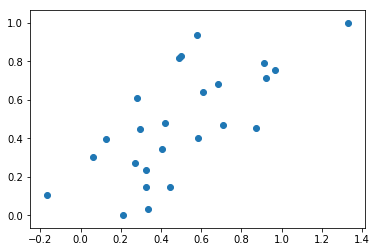

In [149]:
plt.scatter(x='good_corr2', y='bfc', data=blood)
plt.show()

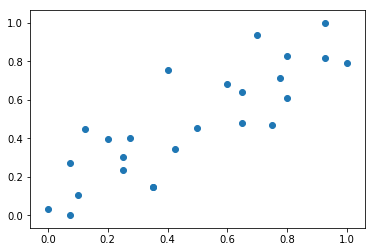

In [150]:
# Age again:
plt.scatter(x='age', y='bfc', data=blood)
plt.show()

### Again Re-Run the Linear Regression Model for the New Variable
The linear model shows an improvement in this case, but still not much higher than the original 0.703.

In [151]:
linmodel = linear_model.LinearRegression()
Y = blood['bfc'].values.reshape(-1,1)
x = ['age', 'good_corr2']
X = blood[x]
linmodel.fit(X, Y)

print('Coefficients: \n', linmodel.coef_)
print('Intercept: \n', linmodel.intercept_)
print('R-squared: ', linmodel.score(X, Y))

Coefficients: 
 [[ 0.62805767  0.22755758]]
Intercept: 
 [ 0.066535]
R-squared:  0.739839969001


### Re-Run the KNN Model for the Two Well-Correlated, Unrelated Variables
For this case the optimal number of neighbors seems to be around 8, with a top average R-squard accuracy of around 0.36. But again, this is still far inferior to the 0.73 accuracy obtained using OLS regression.

Folds = 5 in all cases.

Accuracy with 3 neighbors, unweighted: 0.24; weighted: 0.21

Accuracy with 5 neighbors, unweighted: 0.24; weighted: 0.25

Accuracy with 8 neighbors, unweighted: 0.36; weighted: 0.36

Accuracy with 10 neighbors, unweighted: 0.33; weighted: 0.37

Accuracy with 15 neighbors, unweighted: -0.07; weighted: 0.25

In [166]:
# The unweighted model:
knn = neighbors.KNeighborsRegressor(n_neighbors=12)

# The weighted model:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=12, weights='distance')

Yk = blood['bfc']
Xk_new_var = blood[['age', 'good_corr2']]

knn.fit(Xk_new_var, Yk)
knn_w.fit(Xk_new_var, Yk)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='distance')

In [167]:
score = cross_val_score(knn, Xk_new_var, Yk, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, Xk_new_var, Yk, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.20 (+/- 0.90)
Weighted Accuracy: 0.35 (+/- 0.81)
